# <div style="text-align: center">Machine Learning</div>

<div style="text-align: center"> <sub>ENCN404 - Modern Modelling Practices in Civil Engineering</sub></div>

$\,$

<div style="text-align: center"> University of Canterbury </div>

$\,$

<img src="img/ml.png" alt="Drawing" style="width: 600px;"/>

### Notebook instructions

Run cells containing code by clicking on them and hitting **Ctrl+Enter** or by Cell>Run Cells in the drop-down menu.

For queries, contact the course instructor or notebook author (David Dempsey)

In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Data exploration with Pandas

Work through the examples below during the lecture

### 1.1 DataFrame

In [ ]:
# The most important object is the DataFrame. Think of this like a table in a spreadsheet.
data={'time': [30, 60, 90, 120, 150], 'rainfall': [4, 11, 32, 8, 0], 'runoff': [0, 0, 1.7, 8.6, 3.1]}

# create the dataframe from a dictionary of data
df=pd.DataFrame(data)

# look at the dataframe
df.head()

In [ ]:
# display the column names
df.columns

In [ ]:
# display the row and column counts
df.shape

### 1.2 Index

In [ ]:
# Dataframes have indices. These are like the indices of an array or list, e.g., 0, 1, 2, … -1. 
# The indices populate by default in the Python convention. They can be accessed from the 'index' attribute.
df.index

In [ ]:
# Indices don't have to be integers. We can change them to something else. 
# A popular choice is some kind of measure of time, in which case we are working with time series data.
df.set_index('time', inplace=True)
df.head()

In [ ]:
# We can use indices to get access to parts of the dataframe.
print(df.loc[30])
print(df.loc[90,'rainfall'])
print(df.loc[120:,'runoff'])

### 1.3 Series

In [ ]:
# extract a series (one column) from the larger dataframe
rain=df['rainfall']

# summarize aspects of the series
print(rain.max())             # or min, mean, std, sum
print(rain.describe())
print(rain.unique())          # sort_values, value_counts

In [ ]:
# With matplotlib, we can also generate plots
rain.plot(kind='hist')   # or line, box, pie…
plt.show()

### 1.4 Other operations

In [ ]:
# We'll use the dataframe as a variable on which to do calculations (like a spreadsheet). 
# For example, calculate new columns
df['rnf_rnd']=df['runoff'].round()
df.head()

In [ ]:
# or calculate a summary row
df.max()

In [ ]:
# We can write dataframes out to files, and read them back in again. We'll generally use CSV files.
df.to_csv('rainfall.csv')
df2=pd.read_csv('rainfall.csv')
df2.head()

### 1.5 Rolling window calculations

In [ ]:
# rolling window calculations are a useful series operation
df['avg_rain']=df['rainfall'].rolling(3).mean()
df.head()

In [ ]:
# rolling() can be chained with apply() to any function you can think of, e.g., sum of squares
def sum_of_squares(x):
    return np.sum(x**2)
df['ss_runoff']=df['runoff'].rolling(3).apply(sum_of_squares)
df.head()

### 1.6 Grouping and sorting

In [ ]:
# let's look now at some categorical data in buildings.csv
df=pd.read_csv('buildings.csv')
df

In [ ]:
# we can sort on a particular column
df.sort_values('Cost', ascending=False)

# (Note: sort_values() OUTPUTS a new sorted dataframe. It does not sort the original
#  dataframe unless you set inplace=True)

In [ ]:
# we can group according to a category and calculate summaries of those groups
df.groupby('Type').median()

### 1.7 Outliers

In [ ]:
# we can use pandas to find and replace outliers, for example in the data below
df=pd.DataFrame({'disp': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 10, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8], 'load': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]}) 
plt.plot(df['load'], df['disp'], 'kx'); plt.show()

In [ ]:
# calculate a new column that is the z-score (deviation from the mean)
df['zsc']=(df['disp']-df['disp'].mean())/df['disp'].std()
df

In [ ]:
# find outliers based on large absolute zscores
no_outliers=df['disp'].where(df['zsc'].abs()<3)

# replace the outliers with linear interpolation
df['disp']=no_outliers.interpolate(method='linear') 
plt.plot(df['load'], df['disp'], 'kx'); plt.show()

## 2. Feature engineering

Work through the examples below in the lecture

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### 2.1 Standardization and normalization

Some ML algorithms struggle with data that have order of magnitude different scales and ranges. Z-score standardization transforms these to distributions with zero mean and unit standard deviation.

In [109]:
# Displacement data and calculated strain
u = np.array([0.011, 0.012, 0.014, 0.022, 0.045, 0.123, 0.190, 0.231, 0.245, 0.249, 0.251])   # 2.5 m samples
e = np.diff(u)/2.5  # strain
df = pd.DataFrame({'displacement': u[:-1], 'strain': e})
df

,displacement,strain
0,0.011,0.0004
1,0.012,0.0008
2,0.014,0.0032
3,0.022,0.0092
4,0.045,0.0312
5,0.123,0.0268
6,0.190,0.0164
7,0.231,0.0056
8,0.245,0.0016
9,0.249,0.0008


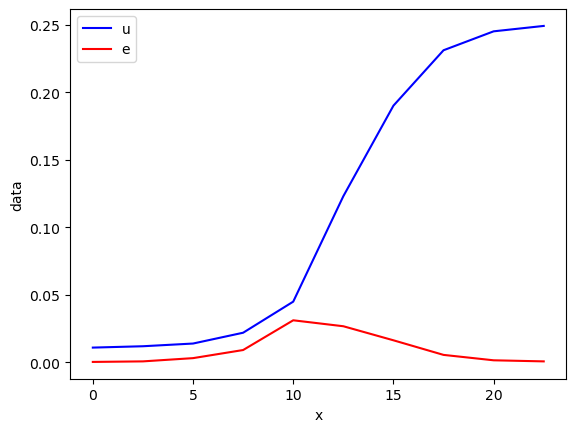

In [110]:
# note how the blue displacement dominates the plot, whereas red strain is less distinctive
# this is because of their different ranges of values
x=np.arange(len(e))*2.5
plt.plot(x, df['displacement'], 'b-', label='u')
plt.plot(x, df['strain'], 'r-', label='e')
plt.gca().set_xlabel('x'); plt.gca().set_ylabel('data')
plt.legend()
plt.show()

In [111]:
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data to a unit normal distribution
scaled_data = scaler.fit_transform(df[['displacement', 'strain']])
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_displacement', 'scaled_strain'])
scaled_df

,scaled_displacement,scaled_strain
0,-1.036312,-0.850802
1,-1.026270,-0.813811
2,-1.006186,-0.591862
3,-0.925852,-0.036991
4,-0.694891,1.997535
5,0.088368,1.590630
6,0.761167,0.628854
7,1.172880,-0.369914
8,1.313465,-0.739828
9,1.353632,-0.813811


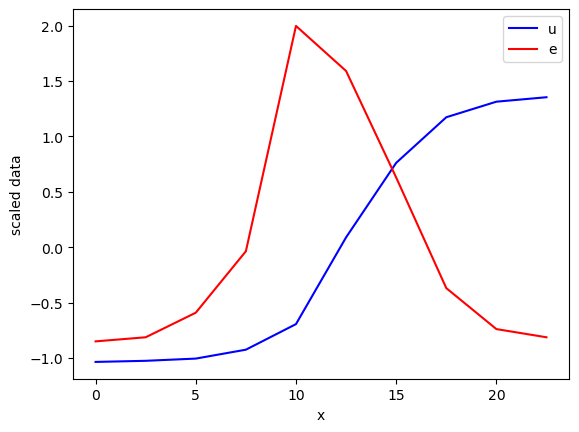

In [112]:
# see how shapes of the data are preserved, but they have been rescaled to have similar range and centre
plt.plot(x, scaled_df['scaled_displacement'], 'b-', label='u')
plt.plot(x, scaled_df['scaled_strain'], 'r-', label='e')
plt.gca().set_xlabel('x'); plt.gca().set_ylabel('scaled data')
plt.legend()
plt.show()

### 2.2 One-hot encoding

Convert categorical data into binary input features, e.g., commercial/not commercial, residential/not residential. This feature is easier for some ML algorithms to work with.

In [113]:
from sklearn.preprocessing import OneHotEncoder
df = pd.DataFrame({'Type': ['Resid', 'Comm', 'Indus', 'Resid', 'Indus', 'Comm']})
df

,Type
0,Resid
1,Comm
2,Indus
3,Resid
4,Indus
5,Comm


In [114]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# Fit and transform the data
encoded_data = encoder.fit_transform(df[['Type']])
encoded_data

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [115]:
# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(['Type']))
# Concatenate the original and encoded dataframes
result_df = pd.concat([df, encoded_df], axis=1)
result_df

,Type,Type_Comm,Type_Indus,Type_Resid
0,Resid,0.0,0.0,1.0
1,Comm,1.0,0.0,0.0
2,Indus,0.0,1.0,0.0
3,Resid,0.0,0.0,1.0
4,Indus,0.0,1.0,0.0
5,Comm,1.0,0.0,0.0


### 2.3 Rolling window features

These are constructed from **WINDOWS** that slide over time series data. A new feature value is calculated by applying some **FUNCTION** to the data contained within the window. When the window moves on, the function is reapplied and a new feature value is calculated. 

These features highlight certain characteristics of the data by supressing noise components not related to that characteristic.

In this example, we have a time series of traffic density at an intersection over two years. The change over time is complex, with a strong first-order trend, overprinted by second-order patterns.

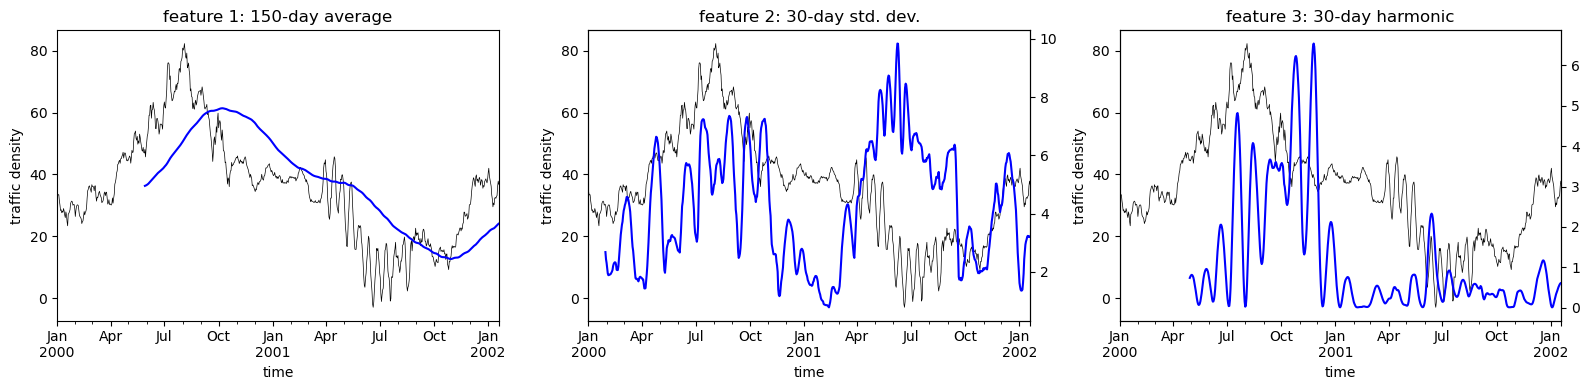

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in some data
df=pd.read_csv('traffic_data.csv',parse_dates=[0]).set_index('time')
ts=df['density']

# plot the raw data
f,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(16,4))
for ax in [ax1,ax2,ax3]:
    ts.plot(style='k-', lw=0.5, ax=ax, label='raw data')

# Calculate a 150-day rolling mean
Tm=150      
df['density_mean']=ts.rolling(window=Tm).mean()
df['density_mean'].plot(style='b',ax=ax1)

# Calculate a 30-day rolling standard deviation
Tsd=30
df['density_std']=ts.rolling(window=Tsd).std()
df['density_std'].plot(style='b', ax=ax2.twinx())

# Calculate a rolling X-day harmonic 
def rolling_fft(x, ti):
    fft = np.fft.fft(x)/len(x)
    psd = np.abs(fft)**2/2
    period_of_interest = ti
    ts=1./(np.fft.fftfreq(len(x)))
    i=np.argmin(abs(ts-ti))
    return psd[i]

Ti=30   # harmonic (days)
ts.rolling(window=120).apply(rolling_fft, args=(Ti,)).plot(style='b', ax=ax3.twinx())

for ax in [ax1,ax2,ax3]:
    ax.set_ylabel('traffic density')
ax1.set_title(f'feature 1: {Tm:d}-day average')
ax2.set_title(f'feature 2: {Tsd:d}-day std. dev.')
ax3.set_title(f'feature 3: {Ti:d}-day harmonic')
plt.tight_layout()
plt.show()

In [135]:
from encn404 import rolling_window
rolling_window()
# run this cell and answer the questions below:
# For feature 1, slide the WINDOW length from 150 to 20 days. How does the feature change?
# Set the SAME window length for features 1 and 2. How are they different?
# For feature 3, what information is it extracting?
# Which feature extracts the first-order trend?
# Which feature identifies second-order characteristics that overprint the trend?
# which of these first- or second-order characteristics are signal and which are noise?

### 2.4 Interaction features

We seek to **combine** different types of data together into new features that may better capture characteristics of the covarying data. For example, the product of two data types. Or a ratio.

In this example, we will suppose that we have strength measurements for concrete samples with different amounts of water and cement, and that have been aged for different lengths of time. Data columns are then Cement (C), Water (W) and Age (A), whereas interaction features could be **ratios** or **products**, e.g., C/W (cement-water ratio), C\*A (cement-age product).

       Cement       Water         Age      Strength
0  275.819461  154.659010  229.311383  2.440315e+06
1  377.110854  200.097807   45.977792  1.949551e+06
2  389.277670  200.937993   89.879993  2.116471e+06
3  332.410077  197.915921  329.555620  2.640793e+06
4  190.700876  224.246703  254.312489  1.472993e+06


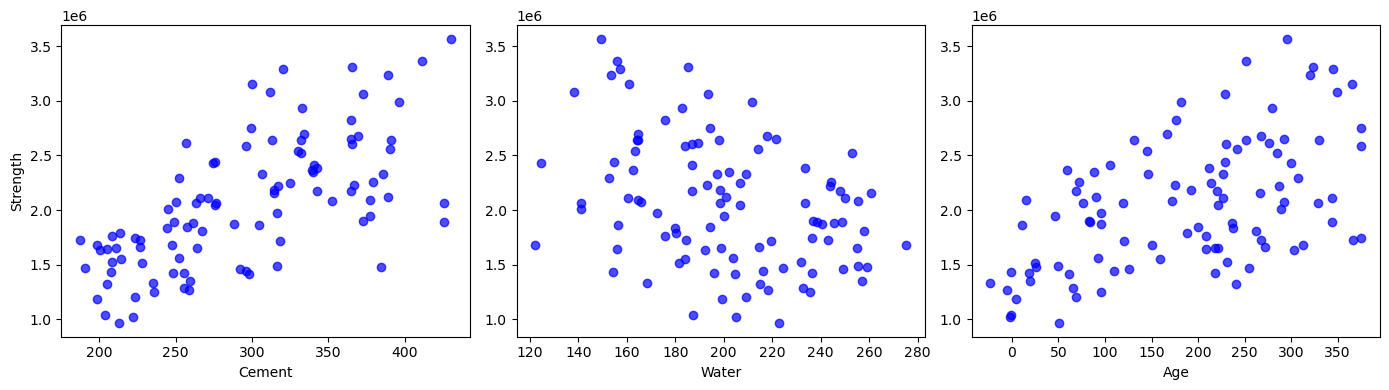

In [123]:
# load in Cement (C), Water (W) and Age (A) data for concrete
df=pd.read_csv('concrete_data.csv')
print(df.head())

# the Strength data will be our 'label' (more on this later)
y=df['Strength']
df=df.drop(columns=['Strength'])

# plot correlations between the raw data and strength
f,axs=plt.subplots(1,3,figsize=(14,4))
for ax,col in zip(axs, df.columns[:3]):
    ax.plot(df[col], y,'bo',alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.tight_layout()
plt.show()

In [124]:
from sklearn.preprocessing import PolynomialFeatures

# Create Polynomial Interaction Features with degree 2, e.g., C*A, W*C
poly = PolynomialFeatures(degree=2, interaction_only=True)
int_features = poly.fit_transform(df)

# get feature names and create a dataframe
feature_names = poly.get_feature_names(df.columns)
df_int = pd.DataFrame(int_features, columns=feature_names)
df_int.head()

,1,Cement,Water,Age,Cement Water,Cement Age,Water Age
0,1.0,275.819461,154.659010,229.311383,42657.964636,63248.541826,35465.071340
1,1.0,377.110854,200.097807,45.977792,75459.054908,17338.724562,9200.055420
2,1.0,389.277670,200.937993,89.879993,78220.673672,34988.274257,18060.305379
3,1.0,332.410077,197.915921,329.555620,65789.246757,109547.609191,65224.304259
4,1.0,190.700876,224.246703,254.312489,42764.042869,48497.614449,57028.737223


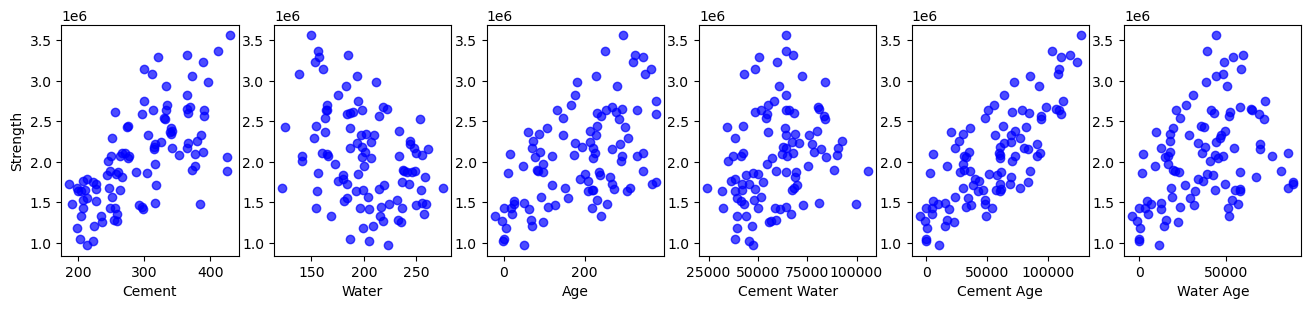

In [127]:
# plot the new interaction features and look for correlations
f,axs=plt.subplots(1,6,figsize=(16,3))
for ax,col in zip(axs, df_int.columns[-6:]):
    ax.plot(df_int[col], y, 'bo', alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.show()

In [128]:
# extend the dataframe with reciprocals, i.e., 1/A, 1/C, 1/W
df2 = pd.DataFrame(1./df.values, columns=[f'{col}^-1' for col in df.columns])
df3 = pd.concat([df,df2], axis=1)

# interaction features now also include ratios, e.g., C/W
poly = PolynomialFeatures(degree=2, interaction_only=True)
int_features = poly.fit_transform(df3)
feature_names = poly.get_feature_names(df3.columns)
df_int2 = pd.DataFrame(int_features, columns=feature_names)
df_int2.head()

,1,Cement,Water,Age,Cement^-1,Water^-1,Age^-1,Cement Water,Cement Age,Cement Cement^-1,...,Water Age,Water Cement^-1,Water Water^-1,Water Age^-1,Age Cement^-1,Age Water^-1,Age Age^-1,Cement^-1 Water^-1,Cement^-1 Age^-1,Water^-1 Age^-1
0,1.0,275.819461,154.659010,229.311383,0.003626,0.006466,0.004361,42657.964636,63248.541826,1.0,...,35465.071340,0.560726,1.0,0.674450,0.831382,1.482690,1.0,0.000023,0.000016,0.000028
1,1.0,377.110854,200.097807,45.977792,0.002652,0.004998,0.021750,75459.054908,17338.724562,1.0,...,9200.055420,0.530607,1.0,4.352053,0.121921,0.229777,1.0,0.000013,0.000058,0.000109
2,1.0,389.277670,200.937993,89.879993,0.002569,0.004977,0.011126,78220.673672,34988.274257,1.0,...,18060.305379,0.516182,1.0,2.235625,0.230889,0.447302,1.0,0.000013,0.000029,0.000055
3,1.0,332.410077,197.915921,329.555620,0.003008,0.005053,0.003034,65789.246757,109547.609191,1.0,...,65224.304259,0.595397,1.0,0.600554,0.991413,1.665129,1.0,0.000015,0.000009,0.000015
4,1.0,190.700876,224.246703,254.312489,0.005244,0.004459,0.003932,42764.042869,48497.614449,1.0,...,57028.737223,1.175908,1.0,0.881776,1.333567,1.134075,1.0,0.000023,0.000021,0.000018


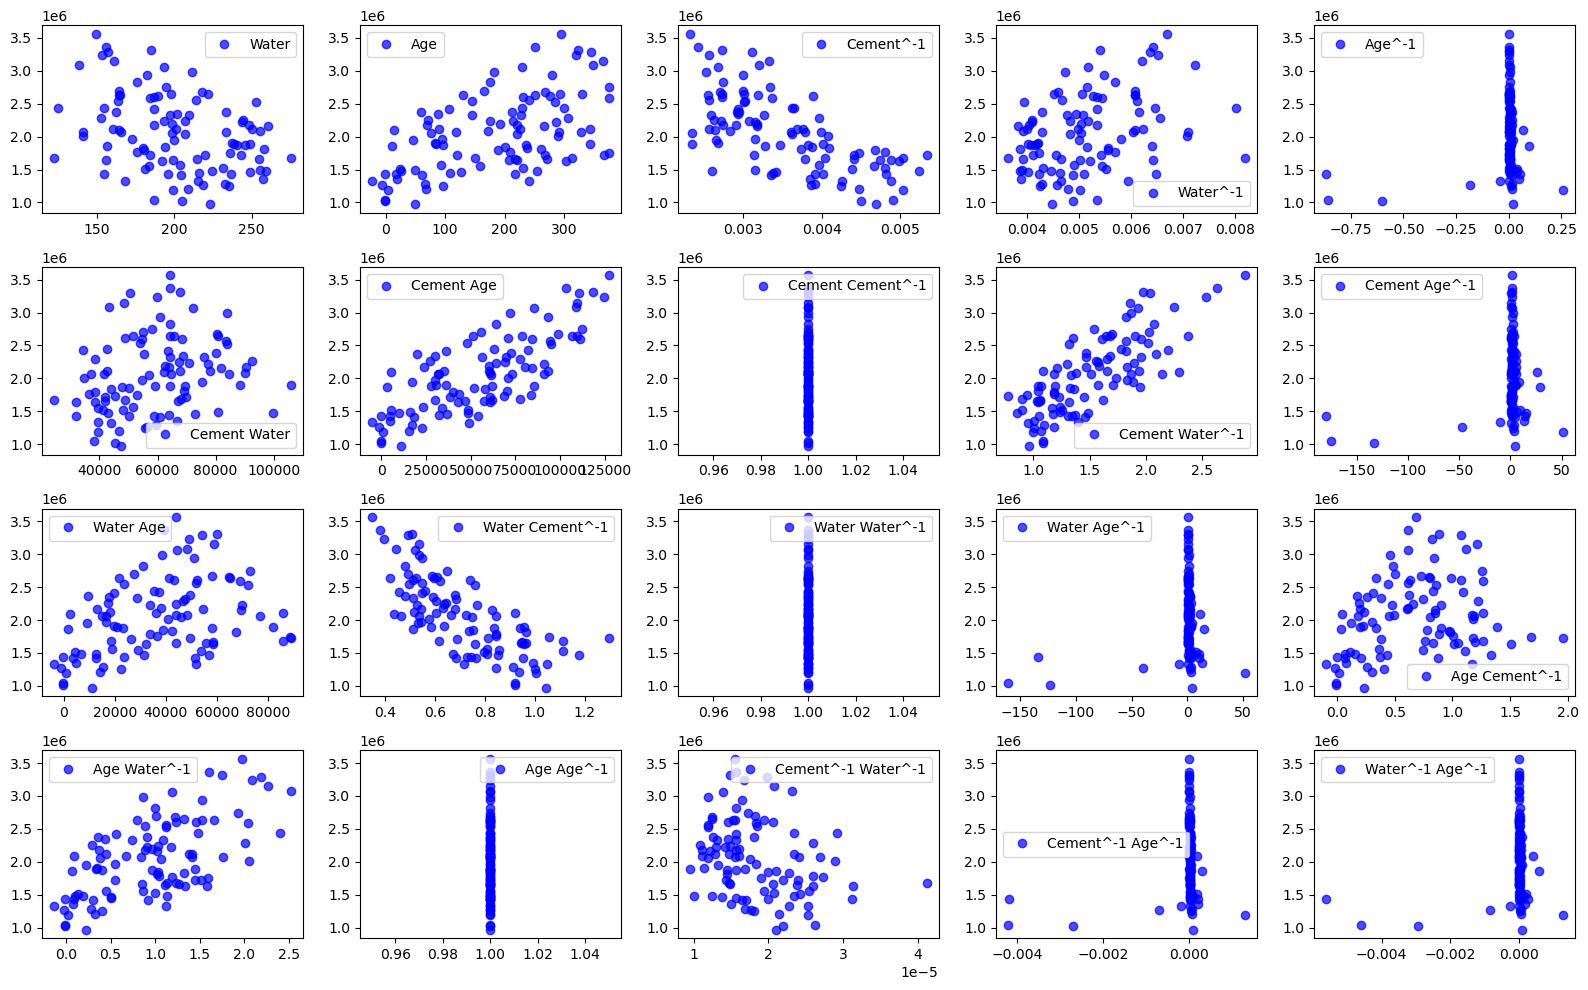

In [129]:
# plot the new interaction features and look for correlations
f,axs=plt.subplots(4,5,figsize=(16,10))
axs=[item for sublist in axs for item in sublist]
for ax,col in zip(axs, df_int2.columns[-20:]):
    ax.plot(df_int2[col], y,'bo',alpha=0.7,label=col)
    ax.legend()
plt.tight_layout()
plt.show()

### 2.5 Principal Component Analysis (PCA)

PCA is a statistical procedure that helps us work with **correlated** data or features. It converts variables that appear related to each other into new sets of uncorrelated variables called principal components. These components capture the **largest directions of variation** within the data.

In [130]:
# load in Cement (C), Water (W) and Age (A) data for concrete
df=pd.read_csv('concrete_data.csv')
print(df.head())

# the Strength data will be our 'label' (more on this later)
y=df['Strength']
df=df.drop(columns=['Strength'])

       Cement       Water         Age      Strength
0  275.819461  154.659010  229.311383  2.440315e+06
1  377.110854  200.097807   45.977792  1.949551e+06
2  389.277670  200.937993   89.879993  2.116471e+06
3  332.410077  197.915921  329.555620  2.640793e+06
4  190.700876  224.246703  254.312489  1.472993e+06


PC1=0.45*Cement+0.59*Water+-0.67*Age,	Explained variance=34%
PC2=0.84*Cement+-0.54*Water+0.10*Age,	Explained variance=33%
PC3=-0.30*Cement+-0.60*Water+-0.74*Age,	Explained variance=32%


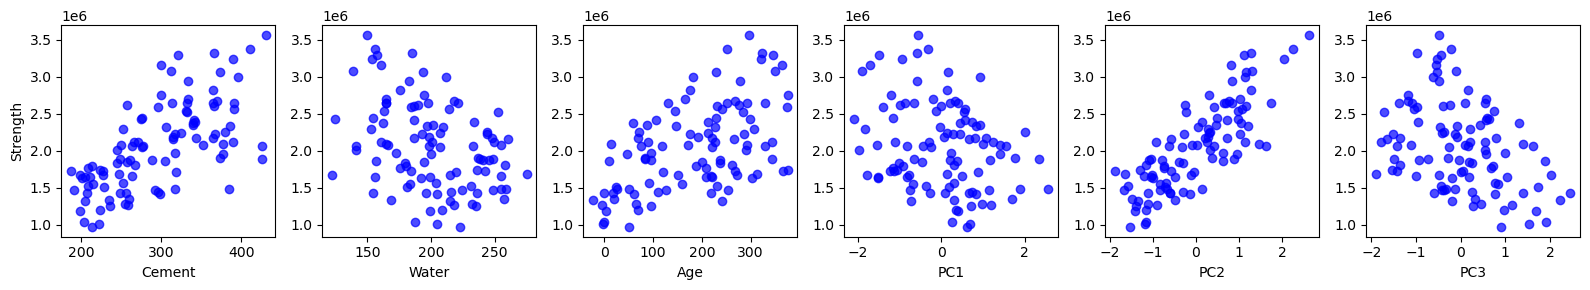

In [131]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate predictors (X) and label (y)
X = df

# Standardize the predictors so they contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 3 components
X_pca = pca.fit_transform(X_scaled)
weights = pca.components_

# Create a new dataframe with the PCA components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca = pd.concat([df,df_pca], axis=1)

# Print the principal component weights and variance
for i in range(3):
    w=weights[i,:]
    s=f'PC{i+1:d}='
    for j,c in enumerate(X.columns):
        s+=f'{w[j]:3.2f}*{c}+'
    print(s[:-1]+f',\tExplained variance={int(pca.explained_variance_ratio_[i]*100):d}%')

# plot the new principal components and look for correlations
f,axs=plt.subplots(1,6,figsize=(16,3))
for ax,col in zip(axs, df_pca.columns):
    ax.plot(df_pca[col], y, 'bo', alpha=0.7)
    ax.set_xlabel(col)
axs[0].set_ylabel('Strength')
plt.tight_layout()
plt.show()

## 3. Unsupervised learning and clustering

### 3.1 Clustering


In [132]:
from encn404 import clustering
clustering()
# run this cell and answer the questions below:
# in step 0, how are the data different from the initial centroid guess?
# in step 1, how is cluster membership determined?
# in step 2, how is the new centroid position calculated?
# in step 3, how and why does cluster membership change?
# when does the algorithm stop?

### 3.2 K-Means

In [133]:
from encn404 import kmeans
kmeans()
# run this cell and answer the questions below:
# In step 0, how many clusters are there? How do you "know" this answer?
# In step 1, there are two clusters. Which one has the better centroid? 
# Does the centroid location, relative to the data, tell us about how good the data are?
# In step 2, we have selected the right number of clusters. But how would an algorithm know this?
# What is the effect of increasing cluster number beyond what is required by the data?
# How is the Sihouette Score calculated? Ask an AI.
# How can we use the Silhouette Score to determine what the best number of clusters is for our data?

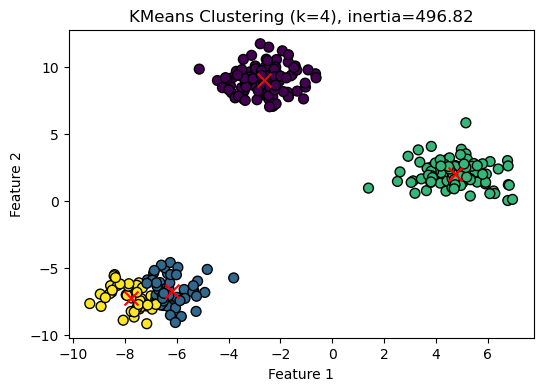

In [134]:
# imports from sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# make up some data
X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)

# create and fit the Kmeans object
kmns = KMeans(n_clusters=4, random_state=42)
kmns.fit(X)

# extract the key clustering outputs
centroids= kmns.cluster_centers_
membership = kmns.predict(X)
ss = silhouette_score(X, membership)
inertia = kmns.inertia_

# plot the clusters
plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], X[:, 1], c=membership, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmns.cluster_centers_[:, 0], kmns.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster centers')
plt.title(f"KMeans Clustering (k=4), inertia={inertia:3.2f}"); plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.show()

### 3.3 DBSCAN

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# make clusters
X, y = make_blobs(n_samples=200, centers=2, cluster_std=1.5, random_state=42)

# add nosie
np.random.seed(42)
X = np.vstack([X, np.random.rand(50, 2) * 14 - 5])

# Apply DBSCAN algorithm
eps = 0.9
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
f,(ax1,ax2)=plt.subplots(1,2,figsize=(10, 4))
ax1.plot(X[:, 0], X[:, 1], 'o', color=[0.7,0.7,0.7], ms=7, mec='k')
unique_labels = np.unique(y_dbscan[y_dbscan != -1])
for label,c in zip(unique_labels,['y','m']):
    ax2.plot(X[y_dbscan == label, 0], X[y_dbscan == label, 1], c+'o', mec='k', ms=7, label=f"Cluster {label}")
ax2.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color='gray', s=50, label="Noise")
ax2.set_title("DBSCAN Clustering")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.legend()
plt.tight_layout()
plt.show()

## 4. Hypothesis testing

Work through the examples below during the lecture

### 4.1 T-test

In [ ]:
from scipy import stats
# Data: compressive strength measurements of two concrete types
concrete_type_A = [30, 32, 31, 33, 29, 28, 30, 31, 32, 30]
concrete_type_B = [35, 34, 33, 36, 32, 31, 33, 34, 35, 33]

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(concrete_type_A, concrete_type_B)

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha: 
    print('different means')

### 4.2 Kendall's Rank Correlation

In [ ]:
# Data: stage and flow measurements on a river
stage = [1.2, 1.5, 1.8, 2.0, 2.3, 2.6, 2.9, 3.2, 3.5, 3.8]
flow = [11.0, 11.3, 12.0, 12.3, 18.0, 18.5, 19.8, 25.3, 28.3, 28.2]

# Calculate Kendall's tau and p-value
tau, p_value = stats.kendalltau(stage, flow)

# - A positive tau indicates a positive correlation (as stage height increases, river flow tends to increase).
# - The p-value tells us if the correlation is statistically significant.
tau, p_value = stats.kendalltau(stage[::3], flow[::3])
print(tau, p_value)

### 4.3 Mann-Whitney U test

In [ ]:
# Perform the Mann Whitney U test
statistic, p_value = stats.mannwhitneyu(concrete_type_A, concrete_type_B, alternative='two-sided')

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha: 
    print('different medians')

## 5. Supervised learning

In [ ]:
# imports and data definitions
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize     # find parameters that minimize the input
from functools import partial           # locks the first N inputs to the function to particular values
from sklearn.linear_model import LinearRegression     # multi-variate linear model
X=np.array([[1.87,6.66,0.78,8.34],[4.75,2.99,0.78,5.91]])
y=np.array([15.28,17.04,3.85,17.52])

### 5.1 Model 1A

In [ ]:
# extract the training set (three data points)
rain=X[0,:3]
runoff=y[:3]

# find the best-fitting linear model
    # define the loss function
def sum_of_squared_differences(feature, runoff, pars):
    m,c=pars
    return np.sum([(runoff_i-m*feature_i-c)**2 for runoff_i,feature_i in zip(runoff,feature)])
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, rain, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[0,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[0,:3], y[:3], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,10], [c_best,m_best*10+c_best], ':', color=[0.2, 0.2, 0.8], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,10]);ax.set_xlabel('rain')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[0,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### Model 1B

In [ ]:
# extract the training set (all data points)
rain=X[0,:]
runoff=y

# find the best-fitting linear model
    # use loss function defined above
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, rain, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[0,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[0,:], y[:], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,10], [c_best,m_best*10+c_best], ':', color=[1, 0.5, 0.5], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,10]);ax.set_xlabel('rain')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[0,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### Model 2A

In [ ]:
# extract the training set (three data points)
soil_condition=X[1,:3]
runoff=y[:3]

# find the best-fitting linear model
    # define the loss function
def sum_of_squared_differences(feature, runoff, pars):
    m,c=pars
    return np.sum([(runoff_i-m*feature_i-c)**2 for runoff_i,feature_i in zip(runoff,feature)])
    # training
m_best, c_best=minimize(partial(sum_of_squared_differences, soil_condition, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[1,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[1,:3], y[:3], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,7], [c_best,m_best*7+c_best], ':', color=[0.2, 0.2, 0.8], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,7]);ax.set_xlabel('soil condition')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[1,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### Model 2B

In [ ]:
# extract the training set (all data points)
soil_condition=X[1,:]
runoff=y

# find the best-fitting linear model
    # use loss function defined above
    # training
from scipy.optimize import minimize     # find parameters that minimize the input
from functools import partial           # locks the first N inputs to the function to particular values
m_best, c_best=minimize(partial(sum_of_squared_differences, soil_condition, runoff), [1,1]).x

# show the result
f,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X[1,:], y, 'o', ms=5, color=[1., 0.5, 0.5], label='all')
ax.plot(X[1,:], y[:], 'o', ms=3, color=[0.2, 0.2, 0.8], label='train')
ax.plot([0,7], [c_best,m_best*7+c_best], ':', color=[1, 0.5, 0.5], label=f'y={m_best:3.2f}x+{c_best:3.2f}')
ax.set_xlim([0,7]);ax.set_xlabel('soil_condition')
ax.set_ylim([0,25]);ax.set_ylabel('runoff')
ax.set_title(f'sum of squares = {sum_of_squared_differences(X[1,:], y, [m_best, c_best]):3.2f}')
ax.legend()
plt.show()

### Model 3

In [ ]:
# Create feature matrix and label vector for training set
X_train = X[:,:3].T
y_train = y[:3]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Generate an out-of-sample point for prediction
X_test = np.array([[8.34, 5.91]])  # Test point with two features

# Make predictions
y_pred = model.predict(X_test)

# Plot the data points and the linear regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Training data')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Test prediction')

# Create a meshgrid for plotting the regression plane
x_grid, y_grid = np.meshgrid(np.linspace(0, 9, 50), np.linspace(0, 6, 50))
z_grid = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis')#, label='Linear regression plane')

ax.set_xlabel('rainfall')
ax.set_ylabel('soil condition')
ax.set_zlabel('runoff')
ax.set_title('Simple Linear Regression with Two Features')
ax.legend()
plt.show()

# Print the prediction result
print(f"Predicted value for X_test: {y_pred[0]:3.2f}. Sum of squares = {(y_pred[0]-y[-1])**2:3.2f}")

## 6. Performance metrics

## 7. Cross validation

## Other

In [ ]:
# Generate some sample time series data
np.random.seed(16)
ts = np.concatenate([np.random.randn(150)*si for si in [1.3, 2.4, 0.7, 1.9, 1.3]])

fs = np.concatenate([np.sin(np.linspace(0,2*np.pi*150,150)/ti)*ai for ti,ai in zip([10, 30, 50, 15, 25],[0.1,0.5,0.3,0.8,0.2])])
ts = np.cumsum(ts)+35+fs*10
print(np.mean(fs), np.std(fs))

ts = pd.Series(ts, index=pd.date_range('1/1/2000', periods=len(ts)))

In [ ]:
# generate some correlated data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)

# Number of data points
n = 100

# Generate random data for cement, water, and age
cement = np.random.uniform(200, 400, n)
water = np.random.uniform(150, 250, n)
age = np.random.uniform(1, 365, n)

# Calculate cement-to-water ratio
cement_water_ratio = cement / water

# Generate synthetic strength data correlated with cement-age product and cement-to-water ratio
strength = 10 * (cement * age) + 100.e4 * cement_water_ratio #+ np.random.normal(0, 5, n)

# Create a DataFrame
df = pd.DataFrame({
    'Cement': cement,
    'Water': water,
    'Age': age,
    'Strength': strength
})

# Add some noise to individual inputs
df['Cement'] += np.random.normal(0, 20, n)
df['Water'] += np.random.normal(0, 20, n)
df['Age'] += np.random.normal(0, 20, n)

# df.to_csv('concrete_data.csv', index=False)